In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.boston_housing.load_data()

In [3]:
train_labels = np.reshape(train_labels, (-1,1))
test_labels = np.reshape(test_labels, (-1,1))
print(train_labels.shape)
print(test_labels.shape)

(404, 1)
(102, 1)


In [4]:
train_data.min(axis=0), train_data.max(axis=0)

(array([6.3200e-03, 0.0000e+00, 4.6000e-01, 0.0000e+00, 3.8500e-01,
        3.5610e+00, 2.9000e+00, 1.1296e+00, 1.0000e+00, 1.8800e+02,
        1.2600e+01, 3.2000e-01, 1.7300e+00]),
 array([ 88.9762, 100.    ,  27.74  ,   1.    ,   0.871 ,   8.725 ,
        100.    ,  10.7103,  24.    , 711.    ,  22.    , 396.9   ,
         37.97  ]))

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
mm_scaler = MinMaxScaler()

In [7]:
mm_scaler.fit(train_data)

MinMaxScaler()

In [8]:
train_data = mm_scaler.transform(train_data)

In [9]:
train_data.min(axis=0), train_data.max(axis=0)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

In [10]:
train_labels.min(), train_labels.max(), test_labels.min(), test_labels.max()

(5.0, 50.0, 5.6, 50.0)

In [11]:
test_data = mm_scaler.transform(test_data)
test_data.min(axis=0), test_data.max(axis=0)

(array([ 7.63179629e-05,  0.00000000e+00,  2.78592375e-02,  0.00000000e+00,
         1.44032922e-02,  2.55422153e-01,  3.19258496e-02,  3.50600687e-02,
         0.00000000e+00, -1.91204589e-03,  4.25531915e-02,  6.13495386e-02,
         5.24282561e-03]),
 array([0.28144109, 0.9       , 1.        , 1.        , 1.        ,
        1.01065066, 1.        , 1.14781801, 1.        , 1.        ,
        0.91489362, 1.        , 0.83498896]))

In [12]:
train_labels = train_labels / 50.
test_labels = test_labels / 50.

In [13]:
train_labels.min(), train_labels.max(), test_labels.min(), test_labels.max()

(0.1, 1.0, 0.11199999999999999, 1.0)

In [14]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

In [15]:
input_layer = Input((13, ))

hidden_layer_1 = Dense(units=13, activation='relu')(input_layer)

hidden_layer_2 = Dense(units=13, activation='relu')(hidden_layer_1)

hidden_layer_3 = Dense(units=5, activation='relu')(hidden_layer_2)

output_layer = Dense(units=1, activation='sigmoid')(hidden_layer_3)

regression_model = Model(input_layer, output_layer)

regression_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense (Dense)                (None, 13)                182       
_________________________________________________________________
dense_1 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 70        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 440
Trainable params: 440
Non-trainable params: 0
_________________________________________________________________


In [16]:
#print(train_data[0], train_labels[0])
#random_first_predict = regression_model(np.reshape(train_data[0], (1, 13)))
#random_first_predict

In [17]:
#print(train_data[1], train_labels[1])
#random_second_predict = regression_model(np.reshape(train_data[1], (1, 13)))
#random_second_predict

In [18]:
#print(train_data[3], train_labels[3])
#random_third_predict = regression_model(np.reshape(train_data[3], (1, 13)))
#random_third_predict

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
early_stop = EarlyStopping(monitor='val_loss', patience=100, mode='min', restore_best_weights=True)

In [21]:
regression_model.compile(optimizer='adam', loss='mse')

In [22]:
regression_model.fit(x=train_data, y=train_labels, batch_size=8, epochs=600,
                     validation_data=(test_data, test_labels), callbacks=[early_stop])

Epoch 1/600
51/51 [==============================] - 0s 2ms/step - loss: 0.0398 - val_loss: 0.0310
Epoch 2/600
51/51 [==============================] - 0s 743us/step - loss: 0.0317 - val_loss: 0.0271
Epoch 3/600
51/51 [==============================] - 0s 684us/step - loss: 0.0260 - val_loss: 0.0207
Epoch 4/600
51/51 [==============================] - 0s 703us/step - loss: 0.0195 - val_loss: 0.0162
Epoch 5/600
51/51 [==============================] - 0s 703us/step - loss: 0.0152 - val_loss: 0.0139
Epoch 6/600
51/51 [==============================] - 0s 703us/step - loss: 0.0126 - val_loss: 0.0133
Epoch 7/600
51/51 [==============================] - 0s 703us/step - loss: 0.0109 - val_loss: 0.0120
Epoch 8/600
51/51 [==============================] - 0s 684us/step - loss: 0.0090 - val_loss: 0.0107
Epoch 9/600
51/51 [==============================] - 0s 684us/step - loss: 0.0081 - val_loss: 0.0112
Epoch 10/600
51/51 [==============================] - 0s 723us/step - loss: 0.0075 - val_loss

51/51 [==============================] - 0s 723us/step - loss: 0.0026 - val_loss: 0.0091
Epoch 82/600
51/51 [==============================] - 0s 723us/step - loss: 0.0026 - val_loss: 0.0093
Epoch 83/600
51/51 [==============================] - 0s 723us/step - loss: 0.0025 - val_loss: 0.0088
Epoch 84/600
51/51 [==============================] - 0s 684us/step - loss: 0.0026 - val_loss: 0.0089
Epoch 85/600
51/51 [==============================] - 0s 703us/step - loss: 0.0027 - val_loss: 0.0085
Epoch 86/600
51/51 [==============================] - 0s 743us/step - loss: 0.0024 - val_loss: 0.0086
Epoch 87/600
51/51 [==============================] - 0s 762us/step - loss: 0.0024 - val_loss: 0.0080
Epoch 88/600
51/51 [==============================] - 0s 762us/step - loss: 0.0024 - val_loss: 0.0083
Epoch 89/600
51/51 [==============================] - 0s 742us/step - loss: 0.0023 - val_loss: 0.0089
Epoch 90/600
51/51 [==============================] - 0s 742us/step - loss: 0.0025 - val_loss: 

Epoch 161/600
51/51 [==============================] - 0s 919us/step - loss: 0.0019 - val_loss: 0.0085
Epoch 162/600
51/51 [==============================] - 0s 898us/step - loss: 0.0018 - val_loss: 0.0078
Epoch 163/600
51/51 [==============================] - 0s 801us/step - loss: 0.0018 - val_loss: 0.0081
Epoch 164/600
51/51 [==============================] - 0s 801us/step - loss: 0.0019 - val_loss: 0.0084
Epoch 165/600
51/51 [==============================] - 0s 938us/step - loss: 0.0019 - val_loss: 0.0078
Epoch 166/600
51/51 [==============================] - 0s 860us/step - loss: 0.0024 - val_loss: 0.0087
Epoch 167/600
51/51 [==============================] - 0s 782us/step - loss: 0.0018 - val_loss: 0.0084
Epoch 168/600
51/51 [==============================] - 0s 743us/step - loss: 0.0018 - val_loss: 0.0081
Epoch 169/600
51/51 [==============================] - 0s 782us/step - loss: 0.0018 - val_loss: 0.0083
Epoch 170/600
51/51 [==============================] - 0s 801us/step - lo

51/51 [==============================] - 0s 743us/step - loss: 0.0017 - val_loss: 0.0077
Epoch 241/600
51/51 [==============================] - 0s 664us/step - loss: 0.0016 - val_loss: 0.0082
Epoch 242/600
51/51 [==============================] - 0s 743us/step - loss: 0.0016 - val_loss: 0.0082
Epoch 243/600
51/51 [==============================] - 0s 841us/step - loss: 0.0017 - val_loss: 0.0080
Epoch 244/600
51/51 [==============================] - 0s 1ms/step - loss: 0.0016 - val_loss: 0.0086
Epoch 245/600
51/51 [==============================] - 0s 645us/step - loss: 0.0016 - val_loss: 0.0083
Epoch 246/600
51/51 [==============================] - 0s 723us/step - loss: 0.0015 - val_loss: 0.0081
Epoch 247/600
51/51 [==============================] - 0s 684us/step - loss: 0.0016 - val_loss: 0.0080
Epoch 248/600
51/51 [==============================] - 0s 684us/step - loss: 0.0015 - val_loss: 0.0084
Epoch 249/600
51/51 [==============================] - 0s 664us/step - loss: 0.0015 - val

Epoch 320/600
51/51 [==============================] - 0s 743us/step - loss: 0.0014 - val_loss: 0.0081
Epoch 321/600
51/51 [==============================] - 0s 703us/step - loss: 0.0014 - val_loss: 0.0076
Epoch 322/600
51/51 [==============================] - 0s 723us/step - loss: 0.0013 - val_loss: 0.0076
Epoch 323/600
51/51 [==============================] - 0s 742us/step - loss: 0.0013 - val_loss: 0.0073
Epoch 324/600
51/51 [==============================] - 0s 703us/step - loss: 0.0015 - val_loss: 0.0079
Epoch 325/600
51/51 [==============================] - 0s 723us/step - loss: 0.0014 - val_loss: 0.0077
Epoch 326/600
51/51 [==============================] - 0s 717us/step - loss: 0.0014 - val_loss: 0.0072
Epoch 327/600
51/51 [==============================] - 0s 723us/step - loss: 0.0014 - val_loss: 0.0077
Epoch 328/600
51/51 [==============================] - 0s 704us/step - loss: 0.0014 - val_loss: 0.0076
Epoch 329/600
51/51 [==============================] - 0s 694us/step - lo

51/51 [==============================] - 0s 860us/step - loss: 0.0013 - val_loss: 0.0072
Epoch 400/600
51/51 [==============================] - 0s 821us/step - loss: 0.0013 - val_loss: 0.0071
Epoch 401/600
51/51 [==============================] - 0s 879us/step - loss: 0.0013 - val_loss: 0.0072
Epoch 402/600
51/51 [==============================] - 0s 703us/step - loss: 0.0014 - val_loss: 0.0077
Epoch 403/600
51/51 [==============================] - 0s 703us/step - loss: 0.0013 - val_loss: 0.0074
Epoch 404/600
51/51 [==============================] - 0s 736us/step - loss: 0.0013 - val_loss: 0.0071
Epoch 405/600
51/51 [==============================] - 0s 742us/step - loss: 0.0013 - val_loss: 0.0070
Epoch 406/600
51/51 [==============================] - 0s 703us/step - loss: 0.0014 - val_loss: 0.0069
Epoch 407/600
51/51 [==============================] - 0s 754us/step - loss: 0.0013 - val_loss: 0.0073
Epoch 408/600
51/51 [==============================] - 0s 704us/step - loss: 0.0013 - v

51/51 [==============================] - 0s 795us/step - loss: 0.0012 - val_loss: 0.0073
Epoch 479/600
51/51 [==============================] - 0s 723us/step - loss: 0.0012 - val_loss: 0.0073
Epoch 480/600
51/51 [==============================] - 0s 723us/step - loss: 0.0012 - val_loss: 0.0067
Epoch 481/600
51/51 [==============================] - 0s 734us/step - loss: 0.0013 - val_loss: 0.0075
Epoch 482/600
51/51 [==============================] - 0s 879us/step - loss: 0.0013 - val_loss: 0.0067
Epoch 483/600
51/51 [==============================] - 0s 832us/step - loss: 0.0012 - val_loss: 0.0071
Epoch 484/600
51/51 [==============================] - 0s 821us/step - loss: 0.0012 - val_loss: 0.0073
Epoch 485/600
51/51 [==============================] - 0s 723us/step - loss: 0.0013 - val_loss: 0.0077
Epoch 486/600
51/51 [==============================] - 0s 821us/step - loss: 0.0013 - val_loss: 0.0074
Epoch 487/600
51/51 [==============================] - 0s 801us/step - loss: 0.0012 - v

51/51 [==============================] - 0s 919us/step - loss: 0.0012 - val_loss: 0.0068
Epoch 558/600
51/51 [==============================] - 0s 860us/step - loss: 0.0012 - val_loss: 0.0069
Epoch 559/600
51/51 [==============================] - 0s 801us/step - loss: 0.0012 - val_loss: 0.0076
Epoch 560/600
51/51 [==============================] - 0s 821us/step - loss: 0.0012 - val_loss: 0.0071
Epoch 561/600
51/51 [==============================] - 0s 862us/step - loss: 0.0013 - val_loss: 0.0069
Epoch 562/600
51/51 [==============================] - 0s 879us/step - loss: 0.0011 - val_loss: 0.0071
Epoch 563/600
51/51 [==============================] - 0s 801us/step - loss: 0.0011 - val_loss: 0.0071
Epoch 564/600
51/51 [==============================] - 0s 919us/step - loss: 0.0011 - val_loss: 0.0076
Epoch 565/600
51/51 [==============================] - 0s 899us/step - loss: 0.0011 - val_loss: 0.0069
Epoch 566/600
51/51 [==============================] - 0s 782us/step - loss: 0.0012 - v

In [23]:
#print(train_data[0], train_labels[0])
#random_first_predict = regression_model(np.reshape(train_data[0], (1, 13)))
#random_first_predict

In [24]:
#print(train_data[1], train_labels[1])
#random_second_predict = regression_model(np.reshape(train_data[1], (1, 13)))
#random_second_predict

In [25]:
#print(train_data[3], train_labels[3])
#random_third_predict = regression_model(np.reshape(train_data[3], (1, 13)))
#random_third_predict

<AxesSubplot:>

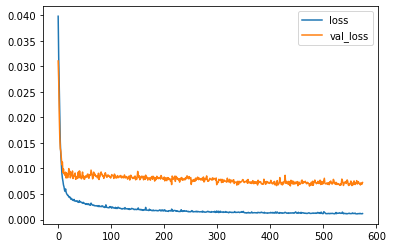

In [26]:
model_history = pd.DataFrame(regression_model.history.history)
model_history.plot()

In [27]:
model_predictions = regression_model.predict(test_data, batch_size=8)

In [28]:
model_predictions = model_predictions * 50.
test_labels = test_labels * 50.

In [29]:
model_predictions[1] , test_labels[1]

(array([19.059694], dtype=float32), array([18.8]))

In [30]:
tf.keras.models.save_model(regression_model, 'first_regression_model.h5')

In [31]:
errors = 0.0
for index in range(len(test_labels)):
    #print(model_prediction, test_labels[idx])
    if abs(model_predictions[index] - test_labels[index]) > 5.0:
        errors += 1
print(1. - (errors / len(test_labels)))

0.9019607843137255
